In [1]:
from keras.layers import Input, Dense
from keras.models import Model
from keras.callbacks import TensorBoard
from time import time
from keras.datasets import mnist
import numpy as np
from keras import regularizers

Using TensorFlow backend.


In [2]:
# this is the size of our encoded representations
encoding_dim = 32  # 32 floats -> compression of factor 24.5, assuming the input is 784 floats

In [3]:
# this is our input placeholder
input_img = Input(shape=(784,))
# "encoded" is the encoded representation of the input
encoded = Dense(encoding_dim, activation='relu')(input_img)

# "decoded" is the lossy reconstruction of the input
decoded = Dense(784, activation='sigmoid')(encoded)

# this model maps an input to its reconstruction
autoencoder = Model(input_img, decoded)
# this model maps an input to its encoded representation
encoder = Model(input_img, encoded)
# create a placeholder for an encoded (32-dimensional) input
encoded_input = Input(shape=(encoding_dim,))
# retrieve the last layer of the autoencoder model
decoder_layer = autoencoder.layers[-1]
# create the decoder model
decoder = Model(encoded_input, decoder_layer(encoded_input))
autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy', metrics=['accuracy'])

In [4]:
(x_train, _), (x_test, _) = mnist.load_data()
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))

In [5]:
# add noise
noise_factor = 0.5
x_train_noisy = x_train + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_train.shape)
x_test_noisy = x_test + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_test.shape)

In [6]:
history = autoencoder.fit(x_train_noisy, x_train,
                epochs=5,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test_noisy, x_test_noisy))

# encode and decode some digits
# note that we take them from the *test* set
encoded_imgs = encoder.predict(x_test)
decoded_imgs = decoder.predict(encoded_imgs)

Train on 60000 samples, validate on 10000 samples
Epoch 1/5
60000/60000 [==============================] - 3s 51us/step - loss: 0.3612 - accuracy: 0.7482 - val_loss: 0.2718 - val_accuracy: 0.0000e+00
Epoch 2/5
60000/60000 [==============================] - 3s 50us/step - loss: 0.2655 - accuracy: 0.7949 - val_loss: 0.2534 - val_accuracy: 0.0000e+00
Epoch 3/5
60000/60000 [==============================] - 3s 50us/step - loss: 0.2475 - accuracy: 0.7953 - val_loss: 0.2324 - val_accuracy: 0.0000e+00
Epoch 4/5
60000/60000 [==============================] - 3s 50us/step - loss: 0.2304 - accuracy: 0.7957 - val_loss: 0.2141 - val_accuracy: 0.0000e+00
Epoch 5/5
60000/60000 [==============================] - 3s 50us/step - loss: 0.2164 - accuracy: 0.7968 - val_loss: 0.1989 - val_accuracy: 0.0000e+00


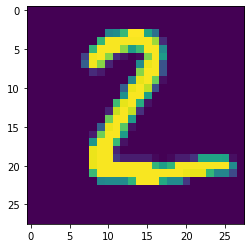

In [23]:
from matplotlib import pyplot as plt
plt.imshow(x_test[1].reshape(28,28))
plt.show()

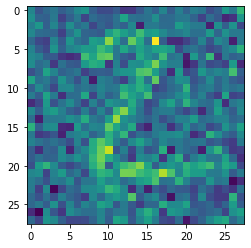

In [18]:
plt.imshow(x_test_noisy[1].reshape(28,28))
plt.show()

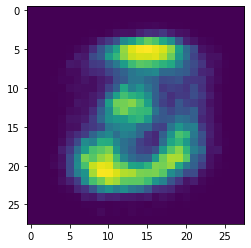

In [20]:
prediction = autoencoder.predict(x_test_noisy[1].reshape(1,784))
plt.imshow(prediction.reshape(28,28))
plt.show()

In [10]:
# final accuracy result
score,acc = autoencoder.evaluate(x_test, x_test, verbose=2)
print("Loss: %.3f" % (score))
print("Accuracy: %.3f" %(acc))

Loss: 0.204
Accuracy: 0.799


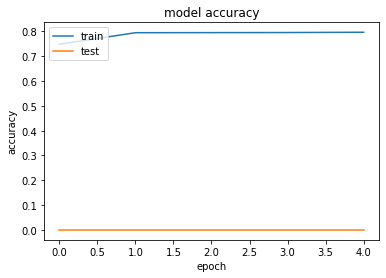

In [11]:
#sumarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

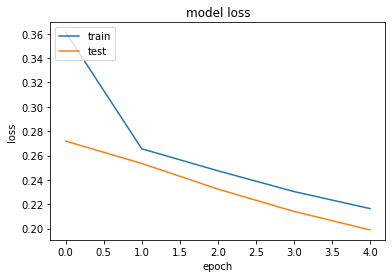

In [12]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()